In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [41]:
fake_data = pd.read_csv('/content/drive/MyDrive/dataset/Fake.csv')
true_data = pd.read_csv('/content/drive/MyDrive/dataset/True.csv')

In [42]:
fake_data['target'] = 0
true_data['target'] = 1

In [43]:
df = pd.concat([fake_data,true_data])
df

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [44]:
df['original'] = df['text'] + ' ' + df['title']

In [45]:
df['original']

0        Donald Trump just couldn t wish all Americans ...
1        House Intelligence Committee Chairman Devin Nu...
2        On Friday, it was revealed that former Milwauk...
3        On Christmas day, Donald Trump announced that ...
4        Pope Francis used his annual Christmas Day mes...
                               ...                        
21412    BRUSSELS (Reuters) - NATO allies on Tuesday we...
21413    LONDON (Reuters) - LexisNexis, a provider of l...
21414    MINSK (Reuters) - In the shadow of disused Sov...
21415    MOSCOW (Reuters) - Vatican Secretary of State ...
21416    JAKARTA (Reuters) - Indonesia will buy 11 Sukh...
Name: original, Length: 44898, dtype: object

In [46]:
df.head()

,title,text,subject,date,target,original
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,Donald Trump just couldn t wish all Americans ...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,House Intelligence Committee Chairman Devin Nu...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,"On Friday, it was revealed that former Milwauk..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,"On Christmas day, Donald Trump announced that ..."
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,Pope Francis used his annual Christmas Day mes...


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


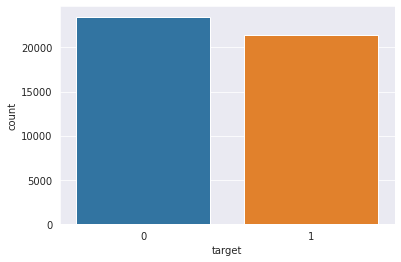

In [47]:
sns.set_style('darkgrid')
sns.countplot(df['target'])

In [48]:
df.isnull().sum()

title       0
text        0
subject     0
date        0
target      0
original    0
dtype: int64

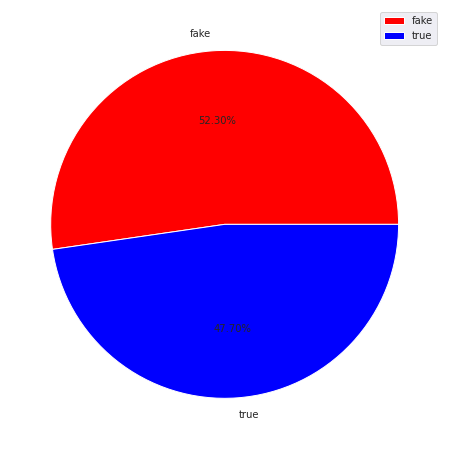

In [49]:
plt.figure(figsize=(10,8))
labels = ['fake','true']
plt.pie(df['target'].value_counts(),labels=labels,colors=['red','blue'],autopct='%1.2f%%')
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


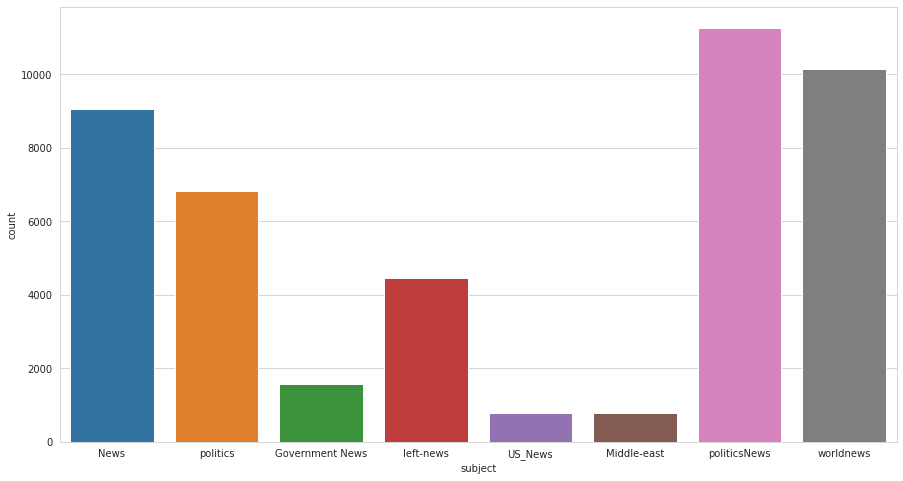

In [50]:
plt.figure(figsize=(15,8))
sns.set_style('whitegrid')
sns.countplot(df['subject'])


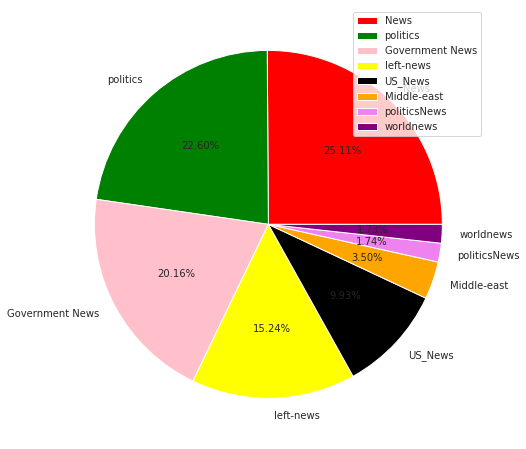

In [51]:
plt.figure(figsize=(15,8))
labels = ['News','politics','Government News','left-news','US_News','Middle-east','politicsNews','worldnews']
plt.pie(df['subject'].value_counts(),labels=labels,autopct='%1.2f%%',colors=['red','green','pink','yellow','black','orange','violet','purple'])
plt.legend()

In [52]:
from wordcloud import WordCloud

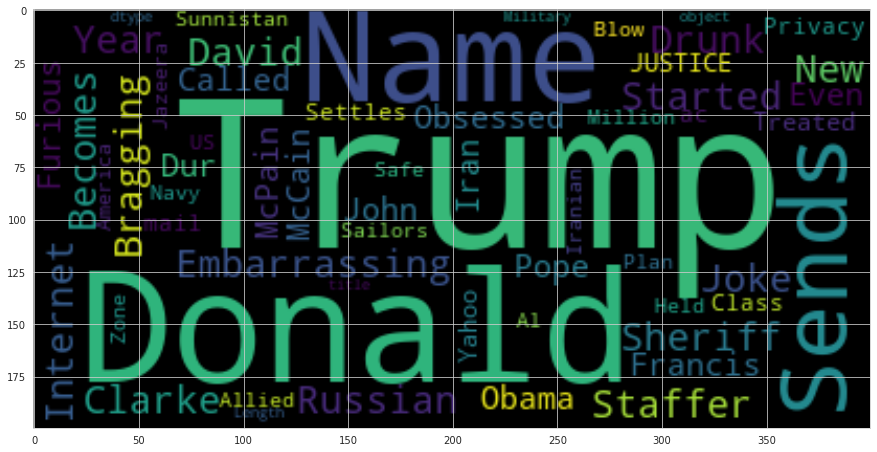

In [53]:
plt.figure(figsize=(15,9))
plot = WordCloud(background_color='black').generate(str(fake_data['title']))
plt.imshow(plot, interpolation="bilinear")


In [54]:
#method 2 for ploting
import re

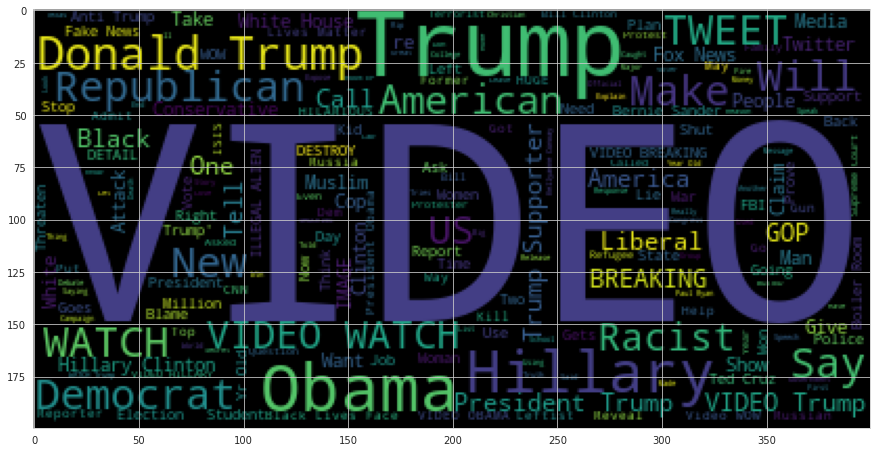

In [55]:
plt.figure(figsize=(15,10))
text = []
for i in fake_data['title']:
    text.append(i)
    
# text = str(text)
# text = re.sub('[~`!@#$%^&*()_":/\|||<>]','',text)
from wordcloud import WordCloud
import matplotlib.pyplot as plt
word = WordCloud(max_font_size=200,background_color="black").generate(str(text))
plt.imshow(word)


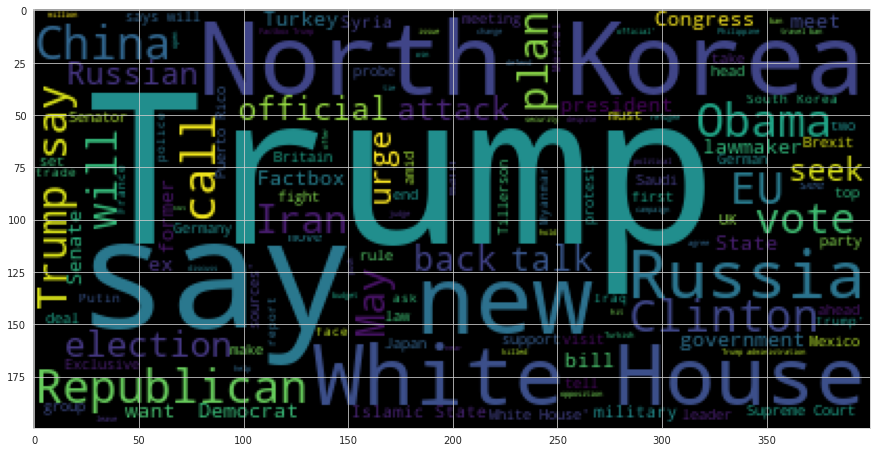

In [56]:
plt.figure(figsize=(15,10))
text = []
for i in true_data['title']:
    text.append(i)
text = str(text)
word = WordCloud(background_color="black").generate(str(text))
plt.imshow(word)

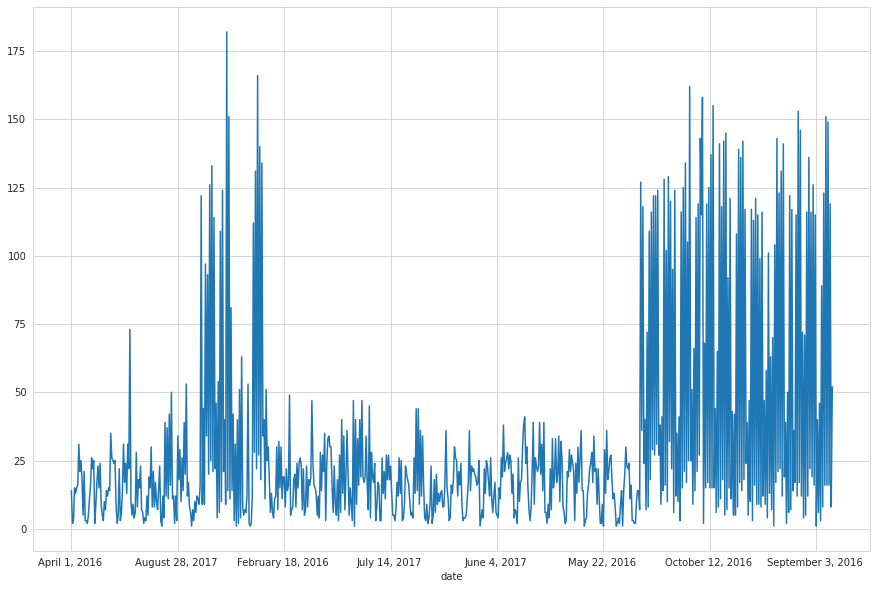

In [57]:
plt.figure(figsize=(15,10))
true=true_data.groupby(['date'])['target'].count()
true.plot()

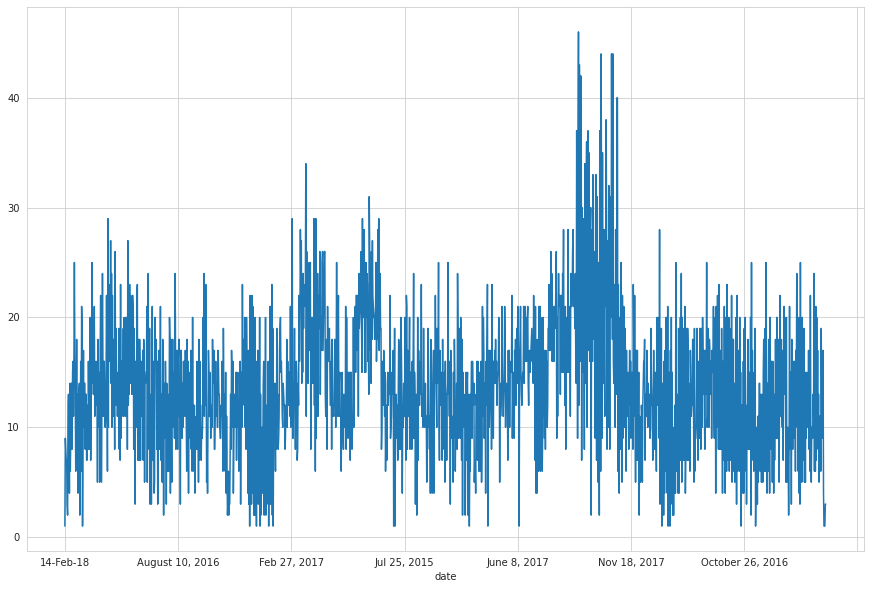

In [58]:
plt.figure(figsize=(15,10))
fake=fake_data.groupby(['date'])['target'].count()
fake.plot()
# fig = px.line(fake)
# fig.show()

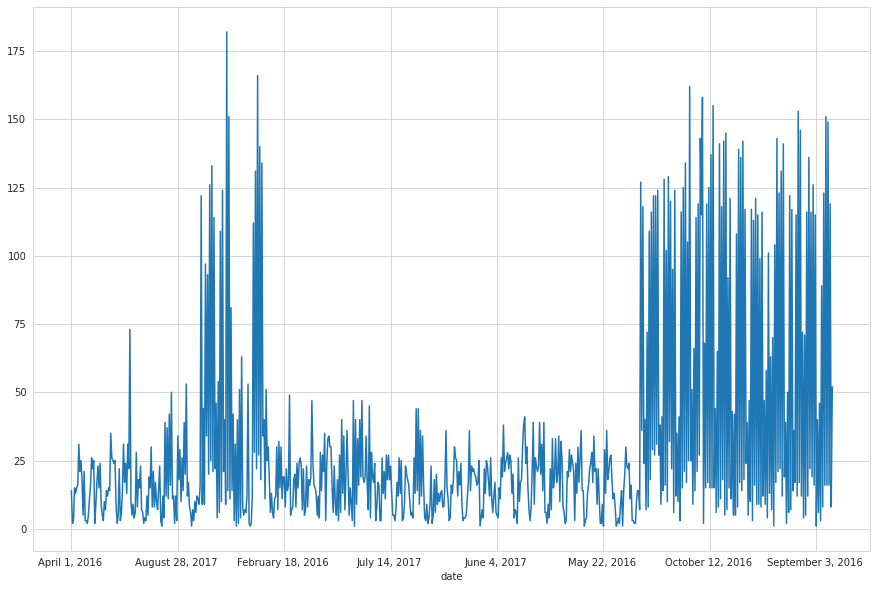

In [59]:
plt.figure(figsize=(15,10))
real=true_data.groupby(['date'])['target'].count()
real.plot()

In [60]:
# Data Preprocessing

In [61]:
def data_preprocessing(data):
    prep1 = data.lower()
    prep2 = re.sub('https?://\S+|www\.\S+','',data)
    prep3 = re.sub('\\W','', data)
    prep4 = re.sub('\n',' ',data)
    prep5 = re.sub(' +',' ',data)
    prep6 = re.sub('^ ','',data)
    prep7 =  re.sub(' $','',data)
    return data

In [62]:
df['original'].apply(data_preprocessing)

0        Donald Trump just couldn t wish all Americans ...
1        House Intelligence Committee Chairman Devin Nu...
2        On Friday, it was revealed that former Milwauk...
3        On Christmas day, Donald Trump announced that ...
4        Pope Francis used his annual Christmas Day mes...
                               ...                        
21412    BRUSSELS (Reuters) - NATO allies on Tuesday we...
21413    LONDON (Reuters) - LexisNexis, a provider of l...
21414    MINSK (Reuters) - In the shadow of disused Sov...
21415    MOSCOW (Reuters) - Vatican Secretary of State ...
21416    JAKARTA (Reuters) - Indonesia will buy 11 Sukh...
Name: original, Length: 44898, dtype: object

In [63]:
from itertools import chain
from collections import Counter
split_words = df['original'].str.split()
list_split_words = list(chain(*split_words))
count_word = Counter(list_split_words)


In [64]:
df_ = pd.DataFrame(data=count_word,index=['count'])
df_

,Donald,Trump,just,couldn,t,wish,all,Americans,a,Happy,New,Year,and,leave,it,at,that.,"Instead,",he,had,to,give,shout,out,his,"enemies,",haters,the,very,dishonest,fake,news,media.,The,former,reality,show,star,one,job,...,Tereza.,Obras,Arranjadas,pelo,Sogro,Father-In-Law.,sub-contracting,inventor.,deliberately.,Headless,intercepted:,"LexisNexis,",(Nexis,Academic),Relx.,"Yegor,",",has","Oktyabrskaya,",out-of-the-way,Svislach.,Oktyabrskaya,"Belgazprombank,",machine-making,(MZOR),MZOR,Maksim,Zhbankov,1054.,"Kirill,",$1.14,Suhkoi,SU-35,Enggartiasto,Lukita,Ryacudu,Perusahaan,Perdangangan,Rostec.,U.S.-imposed,$411
count,27795,111503,22727,1562,41974,770,28395,7192,391144,147,14067,526,393995,2968,88145,70130,1924,754,105988,45666,538754,5233,76,30063,92298,81,67,907070,12605,237,2467,9156,967,99671,16499,1730,6170,1022,29370,3354,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,4,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1


In [65]:
most_freq_words = df_.T.sort_values(by=['count'],ascending=False).reset_index()

In [66]:
most_freq_words

,index,count
0,the,907070
1,to,538754
2,of,441512
3,and,393995
4,a,391144
...,...,...
421940,2016Lowe,1
421941,rest:how,1
421942,fallen?,1
421943,"fringes,",1


In [67]:
# plt.figure(figsize=(15,10))
# sns.barplot(x='index',y='count',data=most_freq_words)
# plt.xticks(rotation=90)

In [68]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [69]:
stop = set(stopwords.words('english'))
def remove_stopwords(data):
    words = [word for word in data if word not in stop]
    words = "".join(words).split()
    words = [words.lower() for words in data.split()]
    return words

In [70]:
df['original'].apply(remove_stopwords)

0        [donald, trump, just, couldn, t, wish, all, am...
1        [house, intelligence, committee, chairman, dev...
2        [on, friday,, it, was, revealed, that, former,...
3        [on, christmas, day,, donald, trump, announced...
4        [pope, francis, used, his, annual, christmas, ...
                               ...                        
21412    [brussels, (reuters), -, nato, allies, on, tue...
21413    [london, (reuters), -, lexisnexis,, a, provide...
21414    [minsk, (reuters), -, in, the, shadow, of, dis...
21415    [moscow, (reuters), -, vatican, secretary, of,...
21416    [jakarta, (reuters), -, indonesia, will, buy, ...
Name: original, Length: 44898, dtype: object

In [73]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatization(text):
    lemmas=[]
    for word in text.split():
        lemmas.append(lemmatizer.lemmatize(word))
    return " ".join(lemmas)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [74]:
df['original'].apply(lemmatization)

0        Donald Trump just couldn t wish all Americans ...
1        House Intelligence Committee Chairman Devin Nu...
2        On Friday, it wa revealed that former Milwauke...
3        On Christmas day, Donald Trump announced that ...
4        Pope Francis used his annual Christmas Day mes...
                               ...                        
21412    BRUSSELS (Reuters) - NATO ally on Tuesday welc...
21413    LONDON (Reuters) - LexisNexis, a provider of l...
21414    MINSK (Reuters) - In the shadow of disused Sov...
21415    MOSCOW (Reuters) - Vatican Secretary of State ...
21416    JAKARTA (Reuters) - Indonesia will buy 11 Sukh...
Name: original, Length: 44898, dtype: object

In [75]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
x = df['original']
y = df['target']
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)
word_to_index = tokenizer.word_index
max_length = 10000
embedding_dim = 16
vocab_size = len(word_to_index)+1

x = tokenizer.texts_to_sequences(x)
X = pad_sequences(x, maxlen=max_length)



In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [78]:
from keras.layers import Dense, Dropout, Embedding, Flatten, MaxPooling1D, Conv1D, LSTM
from keras.models import Sequential
import tensorflow as tf

In [79]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length = max_length))
model.add(Conv1D(32,7, activation='relu'))
model.add(MaxPooling1D())
model.add(Conv1D(32,7, activation='relu'))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(Dense(1,activation='sigmoid'))


In [80]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10000, 16)         2363344   
_________________________________________________________________
conv1d (Conv1D)              (None, 9994, 32)          3616      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 4997, 32)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 4991, 32)          7200      
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 2,374,193
Trainable params: 2,374,193
Non-trainable params: 0
______________________________________________

In [81]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [82]:
model.fit(X_train,y_train, epochs=5, verbose=1,batch_size=128,validation_data=(X_test,y_test))

Epoch 1/5
246/246 [==============================] - 79s 134ms/step - loss: 0.4081 - accuracy: 0.7573 - val_loss: 0.0032 - val_accuracy: 0.9993
Epoch 2/5
246/246 [==============================] - 33s 133ms/step - loss: 0.0019 - accuracy: 0.9996 - val_loss: 0.0026 - val_accuracy: 0.9992
Epoch 3/5
246/246 [==============================] - 32s 132ms/step - loss: 2.7820e-04 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 0.9991
Epoch 4/5
246/246 [==============================] - 32s 130ms/step - loss: 1.3483e-04 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 0.9993
Epoch 5/5
246/246 [==============================] - 32s 131ms/step - loss: 6.6814e-05 - accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 0.9992


In [83]:
X_train.shape, y_train.shape

((31428, 10000), (31428,))

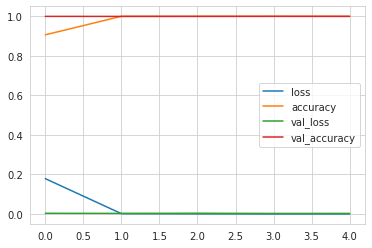

In [84]:
df = pd.DataFrame(model.history.history)
df.plot()

In [85]:
predicted_value = model.predict(X_test)

In [86]:
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
accuracy_value = roc_auc_score(y_test,predicted_value)
print(accuracy_value)

0.9999965733353003


In [87]:
prediction=[]
for i in range(len(predicted_value)):
    if predicted_value[i].item()>0.5:
        prediction.append(1)
    else:
        prediction.append(0)
        

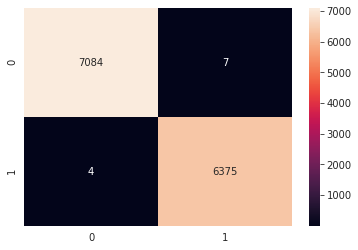

In [88]:
confusion = confusion_matrix(y_test,prediction)
sns.heatmap(confusion,annot=True,fmt='g')

In [89]:
model2 = Sequential()
model2.add(Embedding(vocab_size, embedding_dim,input_length=max_length))
model2.add(Conv1D(32,5 ,activation='relu'))
model2.add(MaxPooling1D(3))
model2.add(Conv1D(32,5 ,activation='relu'))
model2.add(LSTM(64))
model2.add(Dense(1, activation='sigmoid'))
model2.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 10000, 16)         2363344   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 9996, 32)          2592      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 3332, 32)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 3328, 32)          5152      
_________________________________________________________________
lstm (LSTM)                  (None, 64)                24832     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 2,395,985
Trainable params: 2,395,985
Non-trainable params: 0
____________________________________________

In [90]:
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model2.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test),verbose=1,batch_size=128)

Epoch 1/5
246/246 [==============================] - 78s 288ms/step - loss: 0.3005 - accuracy: 0.8362 - val_loss: 0.0190 - val_accuracy: 0.9948
Epoch 2/5
246/246 [==============================] - 71s 287ms/step - loss: 0.0082 - accuracy: 0.9981 - val_loss: 0.0159 - val_accuracy: 0.9954
Epoch 3/5
246/246 [==============================] - 71s 288ms/step - loss: 0.0037 - accuracy: 0.9993 - val_loss: 0.0150 - val_accuracy: 0.9956
Epoch 4/5
246/246 [==============================] - 71s 287ms/step - loss: 0.0090 - accuracy: 0.9974 - val_loss: 0.0192 - val_accuracy: 0.9951
Epoch 5/5
246/246 [==============================] - 70s 287ms/step - loss: 0.0041 - accuracy: 0.9990 - val_loss: 0.0136 - val_accuracy: 0.9962


In [91]:
predicted_value = model2.predict(X_test)

In [92]:
df = pd.DataFrame(model2.history.history)
df.plot()

TypeError: ignored

In [93]:
prediction=[]
for i in range(len(predicted_value)):
    if predicted_value[i]>0.5:
        prediction.append(1)
    else:
        prediction.append(0)

In [ ]:
confusion = confusion_matrix(y_test,prediction)
sns.heatmap(confusion,annot=True,fmt='g')

In [ ]:
# Thank you...